# Illustrate inference scaling for cancer growth model

In [1]:
import os
import string

import chi
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

## Import results

In [13]:
# Import scaling results with number of snapshot measurements
directory = os.getcwd()
data = pd.read_csv(directory + '/scaling_with_measurements.csv')

## Visualise scaling with number of measurements

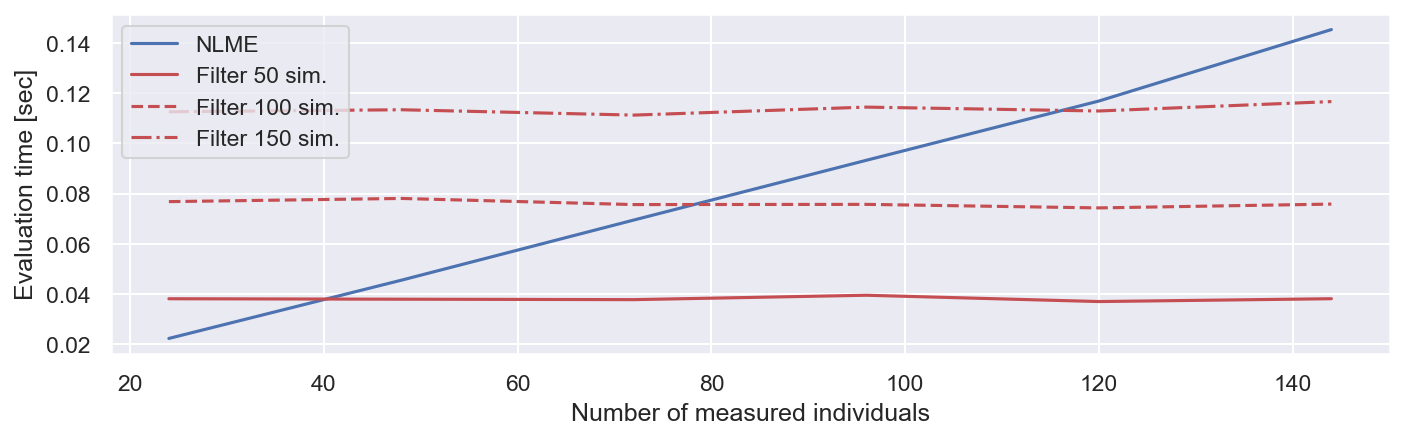

In [21]:
# Create layout
fontsize = 11
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 600 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 1, wspace=0.2)

# Create axis for data
axes = []
axes.append(plt.Subplot(fig, outer[0]))
# axes.append(plt.Subplot(fig, outer[1]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

# Plot scaling behaviour
mask = data.Type == 'NLME'
n_ids = data[mask]['Number of measured individuals']
axes[0].plot(n_ids, data[mask]['Cost in sec'], label='NLME')
mask = data.Type == 'Filter 50'
axes[0].plot(
    n_ids, data[mask]['Cost in sec'],
    label='Filter 50 sim.',
    color=sns.color_palette()[3], linestyle='solid')
mask = data.Type == 'Filter 100'
axes[0].plot(
    n_ids, data[mask]['Cost in sec'],
    label='Filter 100 sim.',
    color=sns.color_palette()[3], linestyle='--')
mask = data.Type == 'Filter 150'
axes[0].plot(
    n_ids, data[mask]['Cost in sec'],
    label='Filter 150 sim.',
    color=sns.color_palette()[3], linestyle='-.')

# Labelling
axes[0].set_xlabel('Number of measured individuals')
axes[0].set_ylabel('Evaluation time [sec]')
plt.legend(loc='upper left')

directory = os.getcwd()
plt.savefig(
    directory + '/01_scaling_with_measurements.tif',
    bbox_inches='tight')
plt.savefig(
    directory + '/01_scaling_with_measurements.pdf',
    bbox_inches='tight')

plt.show()